## loading data into yt from xarray 

This notebook demonstrates how to initialize a yt dataset object from an open xarray dataset.
dataset

### sample data

We'll be using some random sample data in this notebook (as well as many of the others), generated from a convenience function, `yt_xarray.sample_data.load_random_xr_data()`. To use it, we have to supply two dictionaries: one containing fieldnames mapped to the dimension names and a second containing the starting value, end value and number of elements for each dimension:




In [1]:
from yt_xarray.sample_data import load_random_xr_data

fields = {'temperature': ('x', 'y', 'z'), 'pressure': ('x', 'y', 'z')}
dims = {'x': (0,1,15), 'y': (0, 1, 10), 'z': (0, 1, 15)}
ds = load_random_xr_data(fields, dims, length_unit='m')
ds

<xarray.Dataset>
Dimensions:      (x: 15, y: 10, z: 15)
Coordinates:
  * x            (x) float64 0.0 0.07143 0.1429 0.2143 ... 0.8571 0.9286 1.0
  * y            (y) float64 0.0 0.1111 0.2222 0.3333 ... 0.7778 0.8889 1.0
  * z            (z) float64 0.0 0.07143 0.1429 0.2143 ... 0.8571 0.9286 1.0
Data variables:
    temperature  (x, y, z) float64 0.9735 0.3293 0.4365 ... 0.3639 0.7123 0.392
    pressure     (x, y, z) float64 0.926 0.006882 0.3234 ... 0.7249 0.8464 0.829
Attributes:
    geospatial_vertical_units:  m

While we're using random sample data here, note that yt_xarray provides a simple wrapper of the standard xarray `open_dataset` function that will check yt's `test_data_dir` for data if the file is not found in the local path. It is used in the same way as xarray:

```python
ds = yt_xarray.open_dataset("path/to/your/dataset.nc")
```



### Loading data into yt

The primary way of loading data into yt is by creation of a yt dataset object. 

To create a yt dataset that loads all the data variables:

In [5]:
import yt_xarray
import yt

yt_ds = ds.yt.ds()

yt : [INFO     ] 2023-01-11 17:52:35,142 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-01-11 17:52:35,143 Parameters: domain_dimensions         = [15 10 15]
yt : [INFO     ] 2023-01-11 17:52:35,144 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-01-11 17:52:35,145 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-01-11 17:52:35,146 Parameters: cosmological_simulation   = 0


note that this yt dataset actually maintains references to the open xarray dataset! Data will be loaded into yt only as needed. 

Overview of yt dataset.

Mention: 
* yt field tuples: ("stream", "field_name")


yt : [INFO     ] 2023-01-11 17:52:37,998 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-01-11 17:52:37,999 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-01-11 17:52:38,001 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-01-11 17:52:38,001 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-01-11 17:52:38,005 Making a fixed resolution buffer of (('stream', 'temperature')) 800 by 800



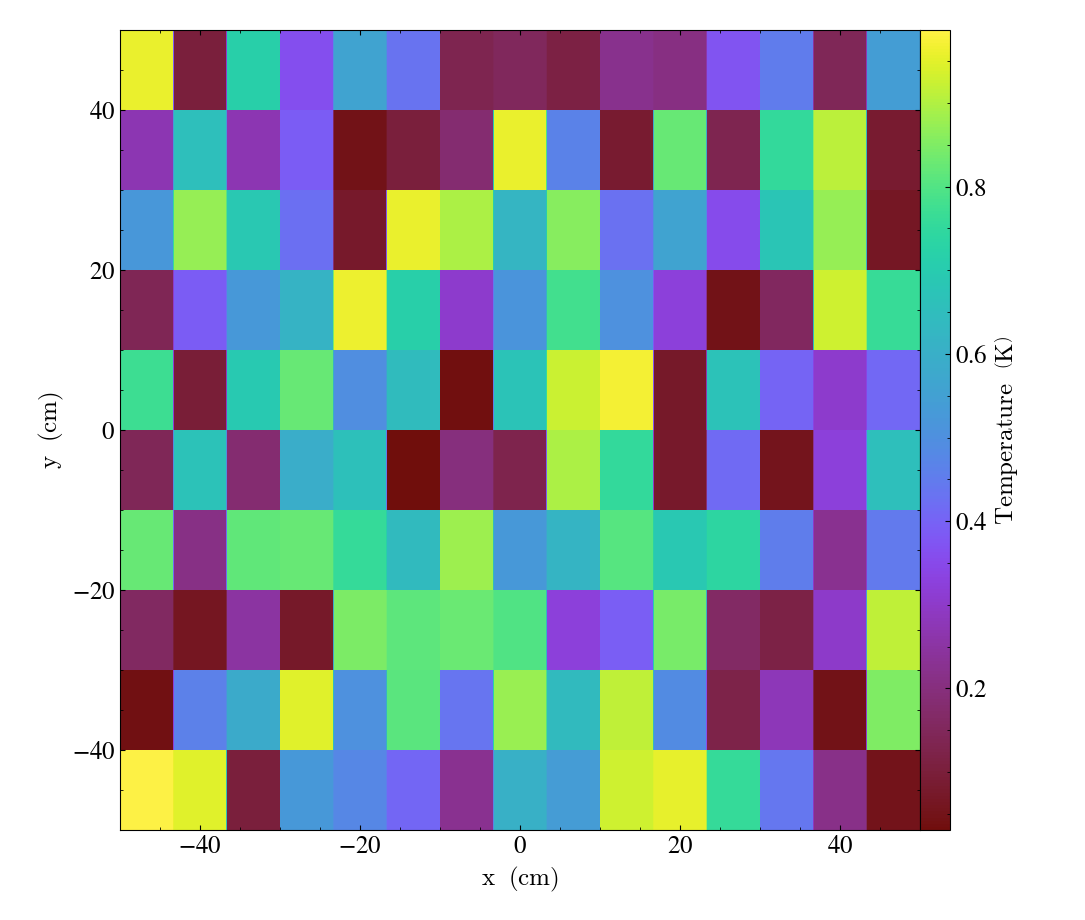

In [6]:
slc = yt.SlicePlot(yt_ds, "z", ("stream", "temperature"))
slc.set_log(("stream", "temperature"), False)
slc.show()

### Some common issues and how to handle them

* coordinate names: see other notebook
* dimension reductions: see other notebook
* length units
* coordinate systems: cartesian vs geographic
* pressure coordinates
* variable grids
